In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

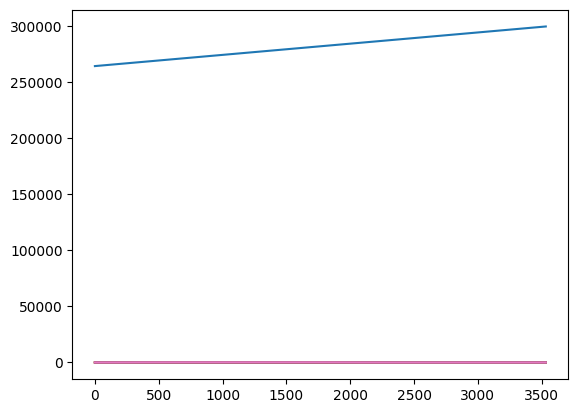

In [2]:
data = pd.read_csv('data10_4.csv')
plt.plot(data)
plt.show()

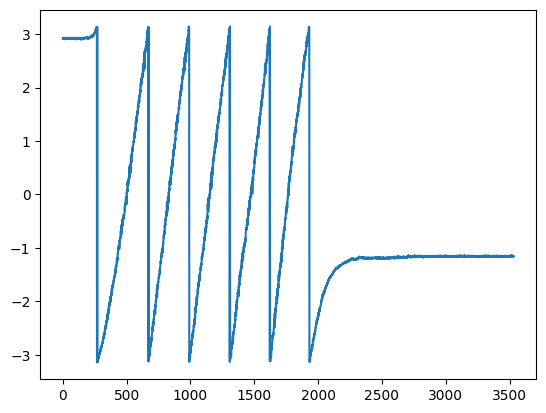

In [3]:
# old method

# distance
old_deg_data = np.arctan2(data['Accel X'], data['Accel Y'])

plt.plot(old_deg_data)
plt.show()

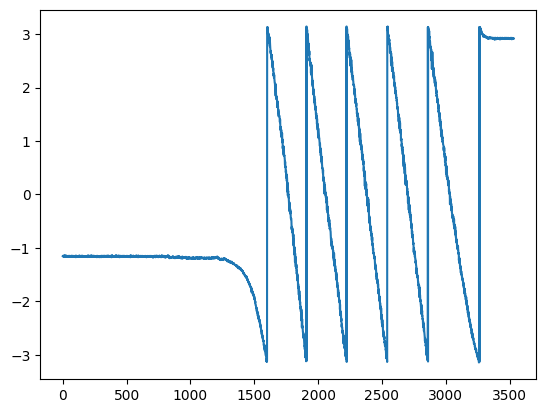

In [4]:
# old method

# distance
old_deg_data = np.arctan2(np.flip(data['Accel X']).reset_index(drop=True), np.flip(data['Accel Y']).reset_index(drop=True))

plt.plot(np.flip(old_deg_data))
plt.show()

In [5]:
# see the difference
standing = []
for idx in range(1, len(old_deg_data)):
    if idx > 2500:
        standing.append(old_deg_data[idx] - old_deg_data[idx-1])
print(np.mean(standing))

0.005163524879638127


# New Method

## raw method

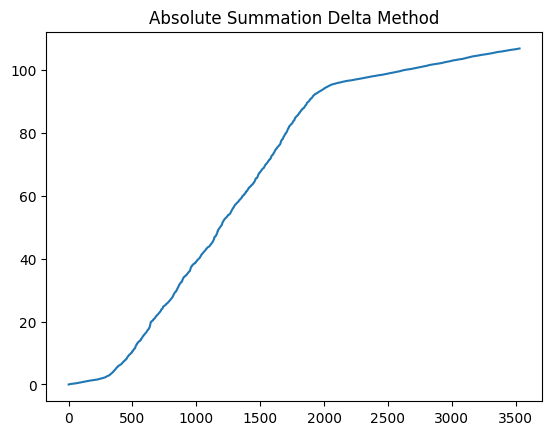

last value = 106.85469061895284 radians
last value = 6122.322793642148 degree
last value = 32.05640718568585 meters


In [6]:
deg_data = np.arctan2(data['Accel X'], data['Accel Y'])

# absolute summation delta
tmp_data = []
cumulative_value = 0
for idx in range(1, len(deg_data)):
    # collect cumulative radians data
    delta = (abs(abs(deg_data[idx]) - abs(deg_data[idx-1])))
    # if delta > 0.1:
    cumulative_value += delta
    tmp_data.append(cumulative_value)

plt.plot(tmp_data)
plt.title('Absolute Summation Delta Method')
plt.show()

print(f'last value = {tmp_data[len(tmp_data) - 1]} radians') 
print(f'last value = {tmp_data[len(tmp_data) - 1] * 180 / np.pi} degree') 
print(f'last value = {tmp_data[len(tmp_data) - 1] * 0.3} meters')

## skip delta thresold method

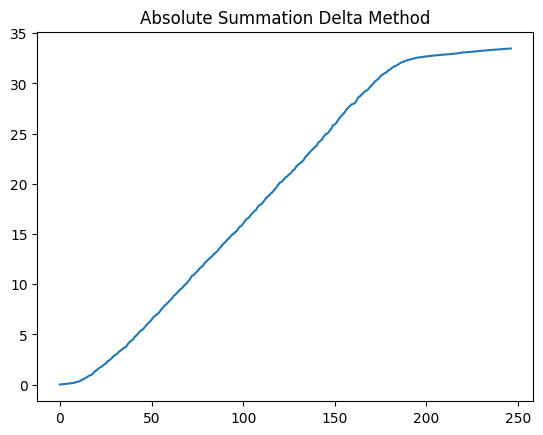

last value = 33.48831609730676 radians
last value = 1918.7391753756935 degree
last value = 10.046494829192026 meters


In [7]:
deg_data = np.arctan2(data['Accel X'], data['Accel Y'])

# absolute summation delta
tmp_data = []
cumulative_value = 0
data_range = 10
for idx in range(data_range, len(deg_data), data_range):
    # collect cumulative radians data
    delta = (abs(abs(deg_data[idx]) - abs(deg_data[idx-data_range])))
    if delta > 0.01:
        cumulative_value += delta
        tmp_data.append(cumulative_value)

plt.plot(tmp_data)
plt.title('Absolute Summation Delta Method')
plt.show()

print(f'last value = {tmp_data[len(tmp_data) - 1]} radians') 
print(f'last value = {tmp_data[len(tmp_data) - 1] * 180 / np.pi} degree') 
print(f'last value = {tmp_data[len(tmp_data) - 1] * 0.3} meters')

## delta threshold

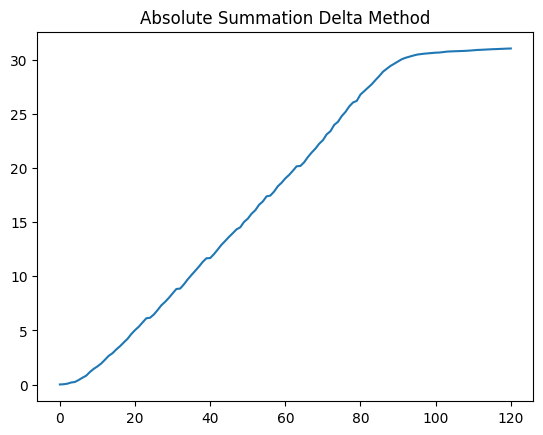

last value = 31.036028403198923 radians
last value = 1778.2334403514458 degree
last value = 9.310808520959677 meters


In [8]:
deg_data = np.arctan2(data['Accel X'], data['Accel Y'])

# absolute summation delta
tmp_data = []
cumulative_value = 0
data_range = 20
for idx in range(data_range, len(deg_data), data_range):
    # collect cumulative radians data
    threshold_delta = (abs(abs(deg_data[idx]) - abs(deg_data[idx-data_range])))
    if threshold_delta > 0.01:
        cumulative_value += threshold_delta
        tmp_data.append(cumulative_value)

plt.plot(tmp_data)
plt.title('Absolute Summation Delta Method')
plt.show()

print(f'last value = {tmp_data[len(tmp_data) - 1]} radians') 
print(f'last value = {tmp_data[len(tmp_data) - 1] * 180 / np.pi} degree') 
print(f'last value = {tmp_data[len(tmp_data) - 1] * 0.3} meters')

# Old Method

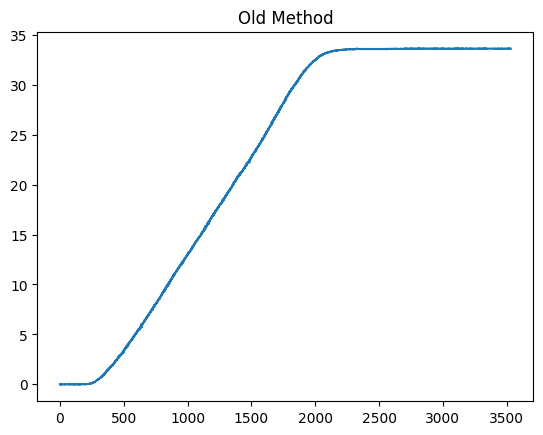

last value = 33.62898622481828 radians
last value = 1926.7989799856705 degree
last value = 10.088695867445482 meters


In [9]:
deg_data_topup = np.copy(deg_data)
# topup data
for i in range(1, len(deg_data_topup)):
    if deg_data_topup[i] - deg_data_topup[i - 1] > np.pi:
        deg_data_topup[i:] -= 2*np.pi

    if deg_data_topup[i] - deg_data_topup[i - 1] < -np.pi:
        deg_data_topup[i:] += 2*np.pi

# remove initial offset
deg_data_topup -= deg_data_topup[0]

plt.plot(deg_data_topup)
plt.title('Old Method')
plt.show()

print(f'last value = {deg_data_topup[len(deg_data_topup) - 1]} radians') 
print(f'last value = {deg_data_topup[len(deg_data_topup) - 1] * 180 / np.pi} degree') 
print(f'last value = {deg_data_topup[len(deg_data_topup) - 1] * 0.3} meters')

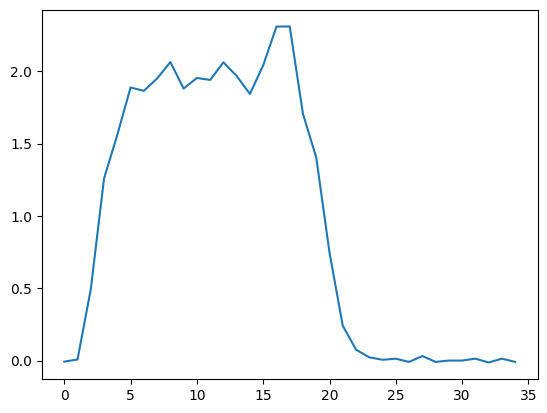

In [10]:
plt.plot(np.diff(deg_data_topup[::100]))
plt.show()

# Real test

old method

In [11]:
np.arctan2(-0.99,0.02) * 180 / np.pi

-88.84266693187048

In [12]:
processed_data = {'distance': [], 'velocity': []}
raw_data = {'accel_x': [], 'accel_y': []}

# initialize data
cumulative_value = 0
for i in range(len(data["Accel X"])):
    try:
        prev_deg = abs(np.arctan2(data['Accel X'][i-1], data['Accel Y'][i-1]))
    except:
        prev_deg = 0
    # calculate degree
    delta = abs(abs(np.arctan2(data['Accel X'][i], data['Accel Y'][i])) - prev_deg)
    # print(delta)
    # if delta > 0.01:
    cumulative_value += delta
    tmp_data.append(cumulative_value)

    processed_data['distance'].append(cumulative_value)

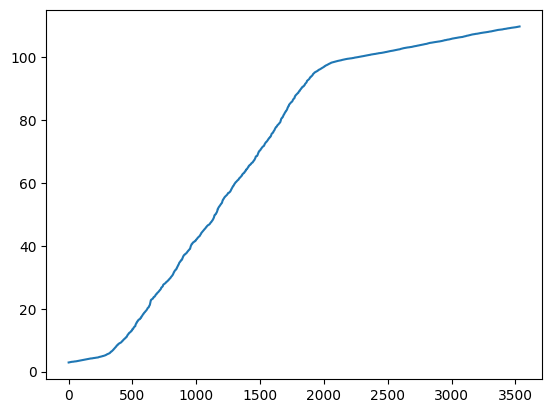

last value = 32.931975691251324 meter


In [13]:
plt.plot(processed_data['distance'])
plt.show()
print(f'last value = {processed_data["distance"][len(processed_data["distance"]) - 1] * 0.3} meter')

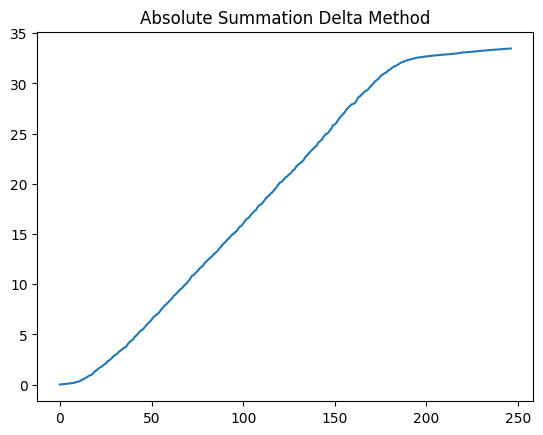

last value = 33.48831609730676 radians
last value = 1918.7391753756935 degree
last value = 10.046494829192026 meters


In [14]:
deg_data = np.arctan2(data['Accel X'], data['Accel Y'])

# absolute summation delta
tmp_data = []
cumulative_value = 0
data_range = 10
for idx in range(data_range, len(deg_data), data_range):
    # collect cumulative radians data
    delta = (abs(abs(deg_data[idx]) - abs(deg_data[idx-data_range])))
    if delta > 0.01:
        cumulative_value += delta
        tmp_data.append(cumulative_value)

plt.plot(tmp_data)
plt.title('Absolute Summation Delta Method')
plt.show()

print(f'last value = {tmp_data[len(tmp_data) - 1]} radians') 
print(f'last value = {tmp_data[len(tmp_data) - 1] * 180 / np.pi} degree') 
print(f'last value = {tmp_data[len(tmp_data) - 1] * 0.3} meters')

new method

In [15]:
def cal_processed_data(accel_x, accel_y, prev_accel_x, prev_accel_y, prev_distance):
    global dist_offset
    # calculate degree
    deg_data = np.arctan2(accel_x, accel_y)
    # calculate previous degree
    prev_deg_data = np.arctan2(prev_accel_x, prev_accel_y)
    deg_data_topup = np.copy(deg_data)
    print(deg_data - prev_deg_data)
    # top up degree
    if deg_data - prev_deg_data > 3:
        deg_data_topup -= 2*np.pi
    if deg_data - prev_deg_data < -3:
        deg_data_topup += 2*np.pi
    if dist_offset is None:
        dist_offset = deg_data_topup * 0.3
    dist = deg_data_topup * 0.3 - dist_offset # 0.3 is radius of the wheel
    vel = dist - prev_distance
    # print("Distance: ", dist)
    return dist, vel

In [16]:
processed_data = {'distance': [], 'velocity': []}
raw_data = {'accel_x': [], 'accel_y': []}
dist_offset = None
# for i in range(len(data["Accel X"])):
for i in range(265,270):
    raw_data["accel_x"].append(float(data['Accel X'][i]))
    raw_data["accel_y"].append(float(data['Accel Y'][i]))
    try:
        prev_accel_x = raw_data["accel_x"][-2]
        prev_accel_y = raw_data["accel_y"][-2]
        prev_distance = processed_data["distance"][-2]
    except:
        prev_accel_x = 0
        prev_accel_y = 0
        prev_distance = 0
    # calculate distance & velocity
    # print(prev_distance)
    dist, vel =(cal_processed_data(float(data['Accel X'][i]), float(data['Accel Y'][i]), float(prev_accel_x), float(prev_accel_y), float(prev_distance)))
    processed_data['distance'].append(dist)
    processed_data['velocity'].append(vel)


3.1116016487329152
3.1219873227325885
-0.0007999998293333199
-6.252780309806383
-0.00019605920736909255


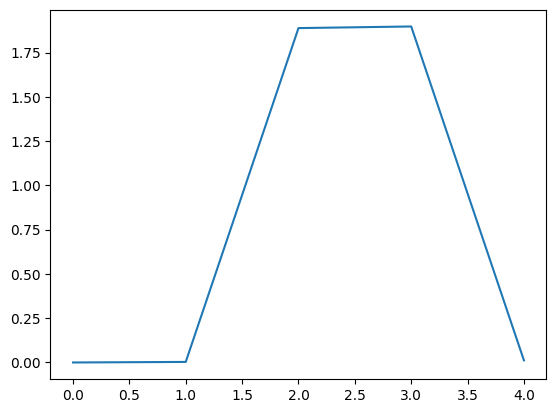

In [17]:
plt.plot(processed_data['distance'])
plt.show()

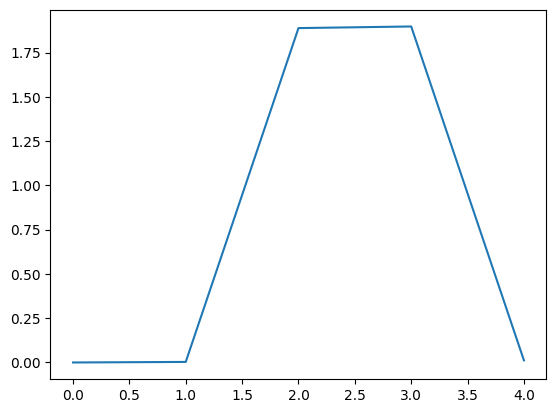

In [18]:
plt.plot(processed_data['distance'])
plt.show()

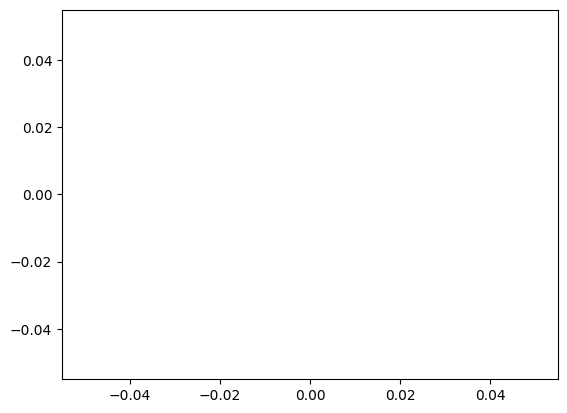

In [19]:
plt.plot(processed_data['distance'][265:276])
plt.show()

In [20]:
with open('data.txt', 'r') as file:
            # Read the contents of the file
            contents = file.read()

            data_text = contents.split('\n')

In [47]:
timestamp = []
accel_x = []
accel_y = []

for data in data_text:
    try:
        data = data.split(', ')
        timestamp.append(float(data[0]))
        accel_x.append(float(data[1]))
        accel_y.append(float(data[2]))
    except:
        pass

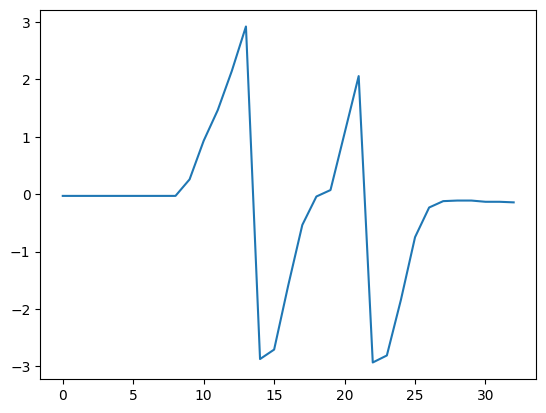

In [50]:
plt.plot(np.arctan2(accel_x, accel_y))
plt.show()

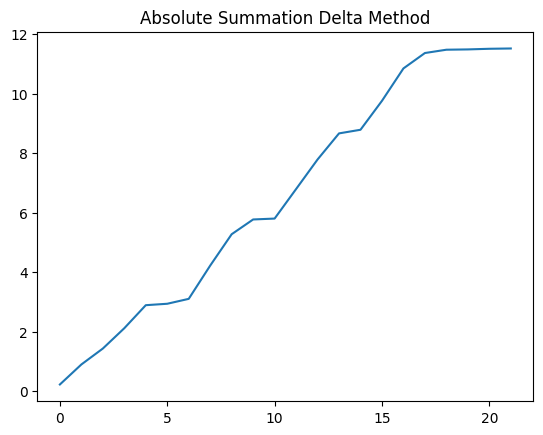

last value = 11.513422948019233 radians
last value = 659.6705426705723 degree
last value = 3.4540268844057698 meters


In [52]:
deg_data = np.arctan2(accel_x, accel_y)

# absolute summation delta
tmp_data = []
cumulative_value = 0
for idx in range(1, len(deg_data)):
    # collect cumulative radians data
    delta = (abs(abs(deg_data[idx]) - abs(deg_data[idx-1])))
    if delta > 0.01:
        cumulative_value += delta
        tmp_data.append(cumulative_value)

plt.plot(tmp_data)
plt.title('Absolute Summation Delta Method')
plt.show()

print(f'last value = {tmp_data[len(tmp_data) - 1]} radians') 
print(f'last value = {tmp_data[len(tmp_data) - 1] * 180 / np.pi} degree') 
print(f'last value = {tmp_data[len(tmp_data) - 1] * 0.3} meters')